In [1]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/Historical_rankings_of_presidents_of_the_United_States'
pres_dfs = pd.read_html(url, dtype_backend='pyarrow')
df = pres_dfs[2]

In [18]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'
df = pd.read_csv(url, index_col=0, dtype_backend='pyarrow')
pd.set_option('display.max_columns', None)
df

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,EAb,LA,CAb,OA,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,2,1,11,2,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,21,21,13,8,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,6,6,4,4,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,13,17,10,6,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,10,12,15,17,12,8,11,9,9,10,5,6,9,8
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,22,23,12,16,29,29,15,17,18,21,15,14,18,18
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,11,9,18,19,6,16,30,25,25,17,23,20,19,19
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,28,27,25,27,16,23,25,31,26,29,27,24,28,25
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,38,29,31,37,36,37,42,41,40,42,44,37,39,39
10,10,John Tyler,Independent,34,33,35,34,22,26,37,36,37,34,36,41,40,38,34,36,36,26,32,36,37


In [21]:
df.dtypes

Seq.         string[pyarrow]
President    string[pyarrow]
Party        string[pyarrow]
Bg            int64[pyarrow]
Im            int64[pyarrow]
Int           int64[pyarrow]
IQ            int64[pyarrow]
L             int64[pyarrow]
WR            int64[pyarrow]
AC            int64[pyarrow]
EAb           int64[pyarrow]
LA            int64[pyarrow]
CAb           int64[pyarrow]
OA            int64[pyarrow]
PL            int64[pyarrow]
RC            int64[pyarrow]
CAp           int64[pyarrow]
HE            int64[pyarrow]
EAp           int64[pyarrow]
DA            int64[pyarrow]
FPA           int64[pyarrow]
AM            int64[pyarrow]
EV            int64[pyarrow]
O             int64[pyarrow]
dtype: object

In [25]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint8[pyarrow]' for col in cols}))
    return (df
            .rename(columns={'Seq.': 'Seq'}) # 1
            .rename(columns={k:v.replace(' ', '_') for k,v in
                             {'Bg': 'Background',
                              'PL': 'Party leadership', 'CAb': 'Communication ability',
                              'RC': 'Relations with Congress', 'CAp': 'Court appointments',
                              'HE': 'Handling of economy', 'L': 'Luck',
                              'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
                              'EAp': 'Executive appointments', 'OA': 'Overall ability',
                              'Im': 'Imagination', 'DA': 'Domestic accomplishments',
                              'Int': 'Integrity', 'EAb': 'Executive ability',
                              'FPA': 'Foreign policy accomplishments',
                              'LA': 'Leadership ability',
                              'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
                              'EV': "Experts' view", 'O': 'Overall'}.items()})
                              .astype({'Party':'category'})  # 2
                              .pipe(int64_to_uint8)  # 3
                              .assign(Average_rank=lambda df_:(df_.select_dtypes('uint8')
                                                               .sum(axis=1).rank(method='dense').astype('uint8[pyarrow]')),
                                                               Quartile=lambda df_:pd.qcut(df_.Average_rank, 4,
                                                                                           labels='1st 2nd 3rd 4th'.split())
                                    )
    )


In [26]:
tweak_siena_pres(df)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,Leadership_ability,Communication_ability,Overall_ability,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,2,1,11,2,18,1,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,21,21,13,8,28,17,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,6,6,4,4,5,5,7,20,4,6,9,7,5,5,5,1st
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,13,17,10,6,9,10,6,14,7,11,19,11,8,7,7,1st
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,10,12,15,17,12,8,11,9,9,10,5,6,9,8,8,1st
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,22,23,12,16,29,29,15,17,18,21,15,14,18,18,18,2nd
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,11,9,18,19,6,16,30,25,25,17,23,20,19,19,19,2nd
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,28,27,25,27,16,23,25,31,26,29,27,24,28,25,25,3rd
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,38,29,31,37,36,37,42,41,40,42,44,37,39,39,38,4th
10,10,John Tyler,Independent,34,33,35,34,22,26,37,36,37,34,36,41,40,38,34,36,36,26,32,36,37,37,4th


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

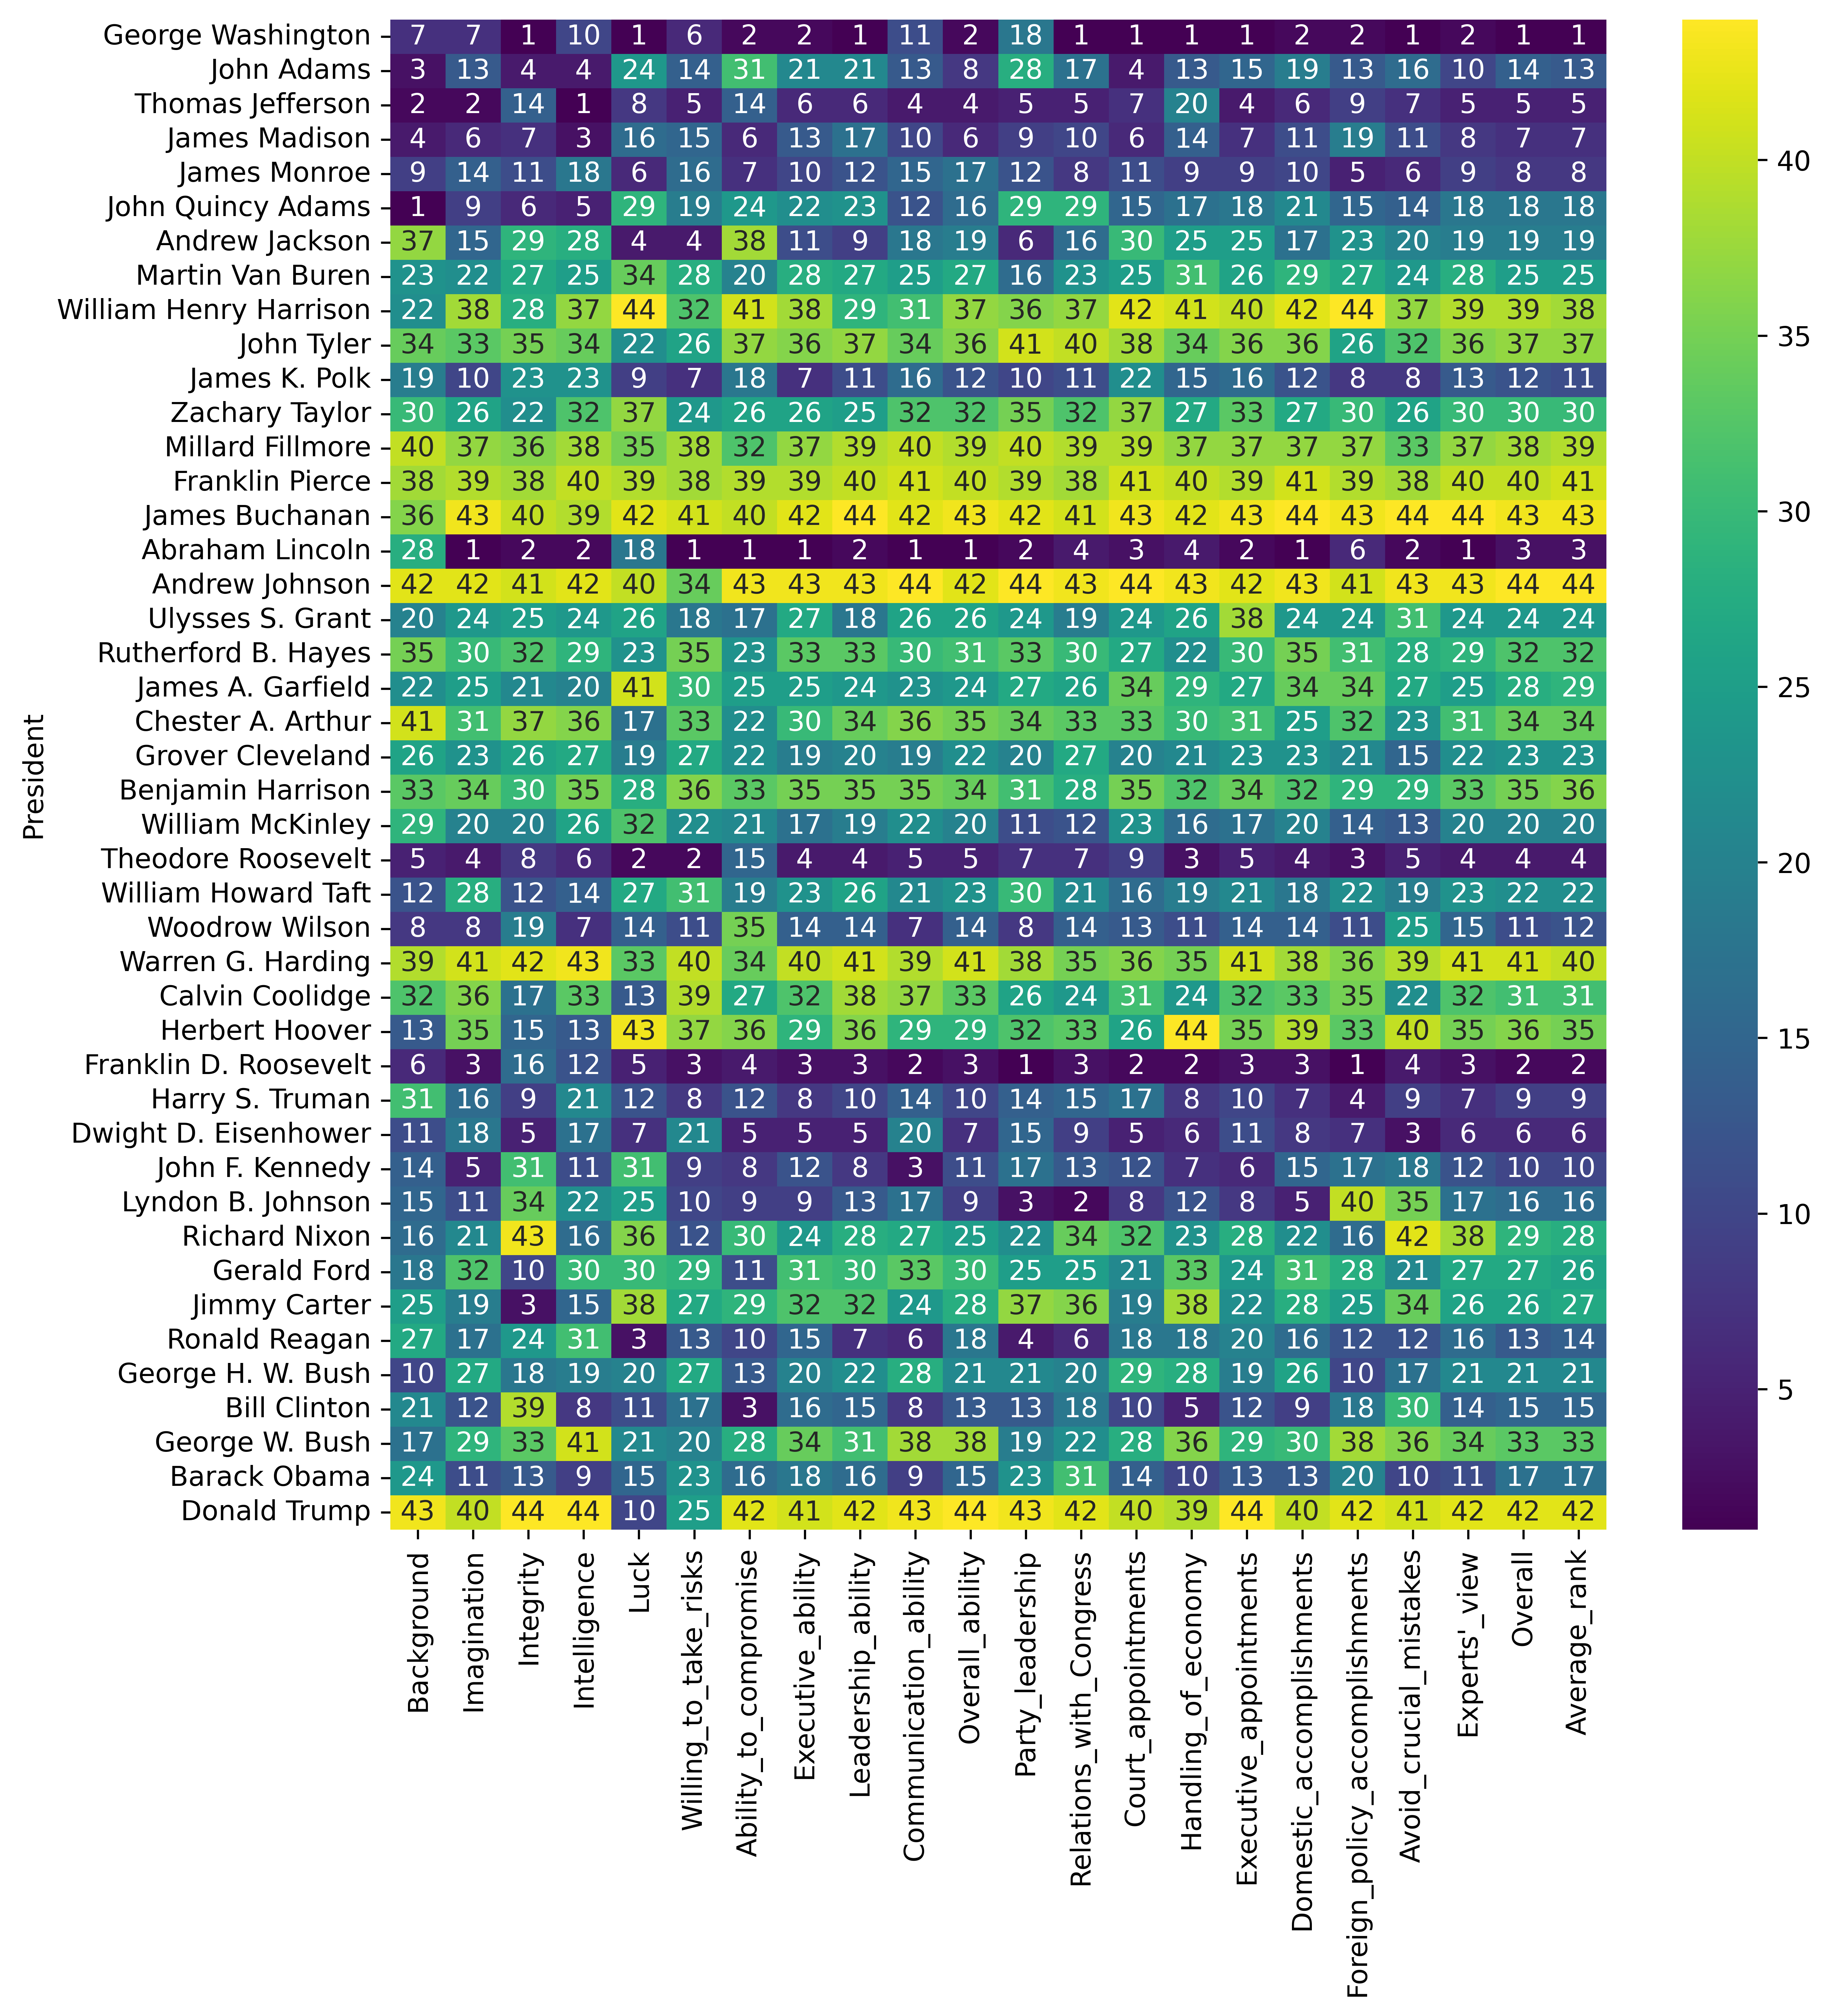

In [28]:
fig, ax = plt.subplots(figsize=(10,10),dpi=600)
g = sns.heatmap((tweak_siena_pres(df)
                 .set_index('President')
                 .loc[:, 'Background':'Average_rank']
                 .astype('int8')
                 ),annot=True, cmap='viridis', ax=ax)

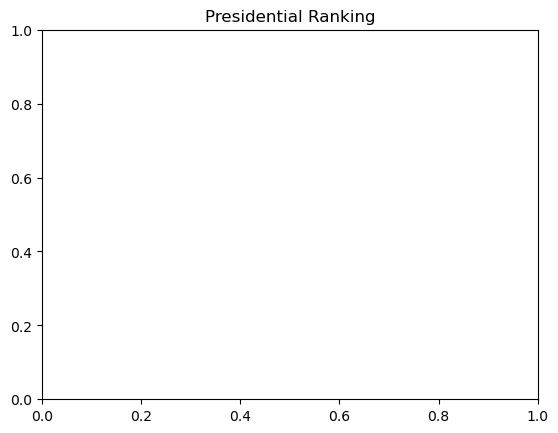

In [30]:
g.set_xticklabels(g.get_xticklabels(),rotation=45, fontsize=8, ha='right')
_ = plt.title('Presidential Ranking')

In [33]:
pres = tweak_siena_pres(df)
pres.head(3)

,Seq,President,Party,Background,Imagination,Integrity,Intelligence,Luck,Willing_to_take_risks,Ability_to_compromise,Executive_ability,Leadership_ability,Communication_ability,Overall_ability,Party_leadership,Relations_with_Congress,Court_appointments,Handling_of_economy,Executive_appointments,Domestic_accomplishments,Foreign_policy_accomplishments,Avoid_crucial_mistakes,Experts'_view,Overall,Average_rank,Quartile
1,1,George Washington,Independent,7,7,1,10,1,6,2,2,1,11,2,18,1,1,1,1,2,2,1,2,1,1,1st
2,2,John Adams,Federalist,3,13,4,4,24,14,31,21,21,13,8,28,17,4,13,15,19,13,16,10,14,13,2nd
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,6,6,4,4,5,5,7,20,4,6,9,7,5,5,5,1st


In [34]:
# Exercises

In [45]:
# Create a dataframe from the data
url = 'https://github.com/mattharrison/datasets/raw/master/data/siena2018-pres.csv'
df_pres_list = pd.read_csv(url, index_col=0, dtype_backend='pyarrow')
df_pres_list

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,EAb,LA,CAb,OA,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,2,1,11,2,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,21,21,13,8,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,6,6,4,4,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,13,17,10,6,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,10,12,15,17,12,8,11,9,9,10,5,6,9,8
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,22,23,12,16,29,29,15,17,18,21,15,14,18,18
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,11,9,18,19,6,16,30,25,25,17,23,20,19,19
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,28,27,25,27,16,23,25,31,26,29,27,24,28,25
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,38,29,31,37,36,37,42,41,40,42,44,37,39,39
10,10,John Tyler,Independent,34,33,35,34,22,26,37,36,37,34,36,41,40,38,34,36,36,26,32,36,37


In [47]:
# View the first 20 rows of data
df_pres_list.head(20)

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,EAb,LA,CAb,OA,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
1,1,George Washington,Independent,7,7,1,10,1,6,2,2,1,11,2,18,1,1,1,1,2,2,1,2,1
2,2,John Adams,Federalist,3,13,4,4,24,14,31,21,21,13,8,28,17,4,13,15,19,13,16,10,14
3,3,Thomas Jefferson,Democratic-Republican,2,2,14,1,8,5,14,6,6,4,4,5,5,7,20,4,6,9,7,5,5
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,13,17,10,6,9,10,6,14,7,11,19,11,8,7
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,10,12,15,17,12,8,11,9,9,10,5,6,9,8
6,6,John Quincy Adams,Democratic-Republican,1,9,6,5,29,19,24,22,23,12,16,29,29,15,17,18,21,15,14,18,18
7,7,Andrew Jackson,Democratic,37,15,29,28,4,4,38,11,9,18,19,6,16,30,25,25,17,23,20,19,19
8,8,Martin Van Buren,Democratic,23,22,27,25,34,28,20,28,27,25,27,16,23,25,31,26,29,27,24,28,25
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,38,29,31,37,36,37,42,41,40,42,44,37,39,39
10,10,John Tyler,Independent,34,33,35,34,22,26,37,36,37,34,36,41,40,38,34,36,36,26,32,36,37


In [65]:
# Sample 30 rows from your data
df_pres_list.sample(30, random_state=42)

,Seq.,President,Party,Bg,Im,Int,IQ,L,WR,AC,EAb,LA,CAb,OA,PL,RC,CAp,HE,EAp,DA,FPA,AM,EV,O
38,39,Jimmy Carter,Democratic,25,19,3,15,38,27,29,32,32,24,28,37,36,19,38,22,28,25,34,26,26
25,26,Theodore Roosevelt,Republican,5,4,8,6,2,2,15,4,4,5,5,7,7,9,3,5,4,3,5,4,4
26,27,William Howard Taft,Republican,12,28,12,14,27,31,19,23,26,21,23,30,21,16,19,21,18,22,19,23,22
37,38,Gerald Ford,Republican,18,32,10,30,30,29,11,31,30,33,30,25,25,21,33,24,31,28,21,27,27
35,36,Lyndon B. Johnson,Democratic,15,11,34,22,25,10,9,9,13,17,9,3,2,8,12,8,5,40,35,17,16
41,42,Bill Clinton,Democratic,21,12,39,8,11,17,3,16,15,8,13,13,18,10,5,12,9,18,30,14,15
5,5,James Monroe,Democratic-Republican,9,14,11,18,6,16,7,10,12,15,17,12,8,11,9,9,10,5,6,9,8
13,13,Millard Fillmore,Whig,40,37,36,38,35,38,32,37,39,40,39,40,39,39,37,37,37,37,33,37,38
9,9,William Henry Harrison,Whig,22,38,28,37,44,32,41,38,29,31,37,36,37,42,41,40,42,44,37,39,39
4,4,James Madison,Democratic-Republican,4,6,7,3,16,15,6,13,17,10,6,9,10,6,14,7,11,19,11,8,7
